In [71]:
%matplotlib inline
import random as rand
import numpy as np
import matplotlib.pyplot as plt
def sign(num):
    if num>0:
        return 1
    else:
        return -1
testTimes=1000
EinRecord=[]
N=1000
for testTime in range(testTimes):
    #generate traning set
    x1=[]
    x2=[]
    y=[]
    for i in range(N):
        x1.append(rand.uniform(-1,1))
        x2.append(rand.uniform(-1,1))
        isFlip=rand.uniform(0,1)
        if isFlip<=0.1:
            y.append(-sign( x1[i]**2 + x2[i]**2 - 0.6 ))
        else:
            y.append(sign(x1[i]**2 + x2[i]**2 - 0.6))
    #linear regression(training)
    x1=np.matrix(x1)
    x1=x1.reshape(N,1)
    x2=np.matrix(x2)
    x2=x2.reshape(N,1)
    temp=np.matrix(np.ones((N,1)))
    X=np.concatenate((temp,x1,x2),axis=1)
    y=np.matrix(y)
    y=y.reshape(N,1)
    w=np.linalg.pinv(X)*y
    #testing
    Ein=0
    for i in range(N):
        if y[i]!=sign(w[0]*1+w[1]*x1[i]+w[2]*x2[i]):
            Ein+=1
    Ein=Ein/N
    EinRecord.append(Ein)
print("Average Ein:",sum(EinRecord)/testTimes)

Average Ein: 0.5061909999999998


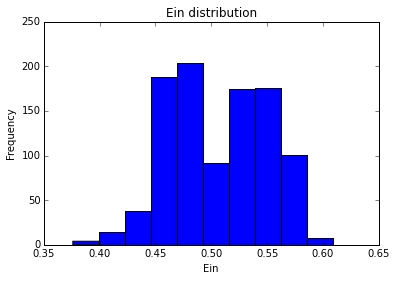

In [72]:
plt.hist(EinRecord)
plt.title("Ein distribution")
plt.xlabel("Ein")
plt.ylabel("Frequency")
plt.show()